In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from crossValidation import *
from overlap_genes import * 

C:\Users\alexi\Desktop\Memory_genes\src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
AE3= np.array(pd.read_csv ('../data/processed_data/AE3.csv'))
y = np.array(AE3[:,-1],dtype=int)
AE3 = AE3[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3,y)

In [5]:
print(AE3.shape, len(pred))
acc = model.score_
print(acc, model.recovery)

(333, 11894) 333
0.42011834319526625 0.6726726726726727


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (71, 98, 0.7244897959183674, 0.6635514018691588, 0.9943574389682174, 0.42011834319526625, 0.9979197966023344, 0.5798816568047337, 0.3364485981308411)


# Without Cross-validation

1475 0.6923076923076923


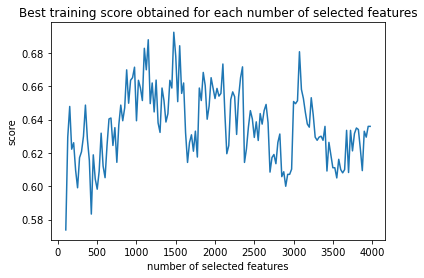

In [ ]:
N = np.arange(100,4000,25)
best_subset, best_score = MIM(y, AE3, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [ ]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.6923076923076923 0.8168168168168168
0.7348066298342542 0.7357357357357357


In [ ]:
MIM_sub = best_subset

In [17]:
get_best_genes_names(MIM_sub, '../data/processed_data/AE3genes_interest.csv', '../data/optimized_subsets/AE3genes_best1.csv')

1309 (0.736318407960199, 0.7837837837837838)


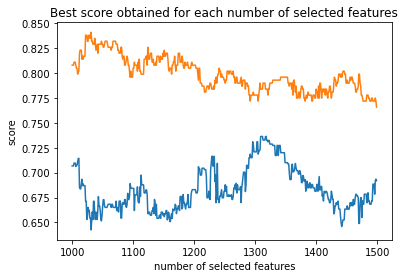

In [4]:
N = np.arange(1000,1500,1)
best_subset, best_score = ANOVA(y, AE3, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [5]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.736318407960199 0.7837837837837838
0.7802197802197802 0.7117117117117117


1309 0.736318407960199


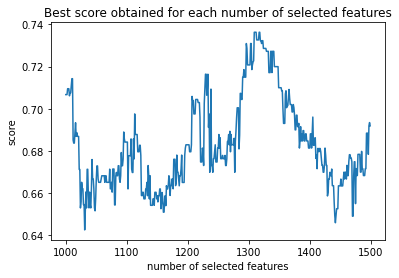

In [30]:
N = np.arange(1000,1500,1)
best_subset, best_score = ANOVA(y, AE3, FamiliesClusters, compute_recovery,True, N, plot=True)
print(len(best_subset), best_score)

In [31]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.736318407960199 0.7837837837837838
0.7840909090909091 0.6966966966966966


In [6]:
ANOVA_sub = best_subset

In [7]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/AE3genes_interest.csv', '../data/optimized_subsets/AE3genes_best.csv')